In [1]:
import xgboost
import numpy as np
import pandas as pd
from math import sqrt
import seaborn as sns
sns.set(style="white", color_codes=True)

import plotly.plotly as py
import plotly.graph_objs as go


import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.pipeline import Pipeline
from sklearn import cross_validation, metrics
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

/opt/conda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



In [2]:
train = pd.read_excel("../input/research_student (1).xlsx")

In [3]:
train.head()

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIVIL,77.57,64.6,Male,BSEB Patna,BSEB Patna,OBC,6.29,44718.0,15.970714,6.02,1.0,4.0,6.12,5.94,5.41,6.25,6.13,1.0,4.0,3.0,2.0,0.0,5.0
2,CSE,86.40,71.8,Male,CBSE,CBSE,GEN,6.47,24222.0,8.650714,6.10,1.0,7.0,6.12,5.88,5.53,6.44,6.19,2.0,2.0,0.0,1.0,0.0,4.0
3,CSE,88.14,78.0,Male,ICSE,ICSE,GEN,7.35,24723.0,8.829643,6.65,1.0,1.0,6.35,6.54,6.41,6.50,6.69,1.0,1.0,3.0,0.0,0.0,5.0
4,CSE,65.40,59.8,Female,CBSE,CBSE,ST,6.41,232157.0,82.913214,6.09,1.0,11.0,6.00,5.71,5.24,5.88,6.25,2.0,0.0,2.0,2.0,0.0,1.0


In [4]:
train

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,CIVIL,77.57,64.60,Male,BSEB Patna,BSEB Patna,OBC,6.29,44718.0,15.970714,6.020,1.0,4.0,6.12,5.94,5.41,6.25,6.130,1.0,4.0,3.0,2.0,0.0,5.0
2,CSE,86.40,71.80,Male,CBSE,CBSE,GEN,6.47,24222.0,8.650714,6.100,1.0,7.0,6.12,5.88,5.53,6.44,6.190,2.0,2.0,0.0,1.0,0.0,4.0
3,CSE,88.14,78.00,Male,ICSE,ICSE,GEN,7.35,24723.0,8.829643,6.650,1.0,1.0,6.35,6.54,6.41,6.50,6.690,1.0,1.0,3.0,0.0,0.0,5.0
4,CSE,65.40,59.80,Female,CBSE,CBSE,ST,6.41,232157.0,82.913214,6.090,1.0,11.0,6.00,5.71,5.24,5.88,6.250,2.0,0.0,2.0,2.0,0.0,1.0
5,CSE,81.00,74.00,Male,CBSE,CBSE,GEN,6.80,23252.0,8.304286,6.130,1.0,0.0,6.06,5.88,6.00,5.93,5.440,2.0,0.0,2.0,2.0,0.0,1.0
6,ECE,74.40,82.00,Male,BSEB,CBSE,GEN,6.88,23257.0,8.306071,6.350,1.0,4.0,6.71,6.35,5.94,5.88,4.560,2.0,0.0,1.0,0.0,2.0,3.0
7,ECE,83.80,73.00,Female,C.B.S.E,C.B.S.E,SC,7.24,103217.0,36.863214,6.690,1.0,0.0,6.53,6.29,6.12,7.00,7.000,3.0,2.0,1.0,3.0,0.0,3.0
8,ECE,82.00,78.00,Male,B.S.E.B,B.S.E.B,GEN,7.00,23010.0,8.217857,6.660,1.0,0.0,7.59,6.35,6.35,6.00,5.500,3.0,2.0,1.0,2.0,1.0,0.0
9,EEE,62.40,60.80,Male,BSEB,BSEB,OBC,5.83,74086.0,26.459286,6.000,1.0,9.0,6.31,6.13,6.06,5.69,6.000,3.0,2.0,1.0,2.0,1.0,0.0


In [5]:
train.tail()

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
218,PROD,91.2,80.6,Male,ICSE,CBSE,GEN,74.70,39792.0,14.211429,7.36,0.0,2.0,71.80,67.20,72.90,81.90,7.69,4.0,1.0,3.0,4.0,0.0,5.0
219,PROD,79.4,63.2,Male,CENTRAL BOARD OF SECONDARY EDUCATION,CENTRAL BOARD OF SECONDARY EDUCATION,OBC,6.71,114306.0,40.823571,6.89,0.0,0.0,6.12,6.41,6.88,7.44,7.69,1.0,1.0,0.0,1.0,0.0,5.0
220,PROD,87.4,83.2,Male,CBSE,CBSE,GEN,7.18,40000.0,14.285714,7.69,0.0,0.0,6.88,7.06,7.88,8.56,8.69,2.0,1.0,1.0,1.0,1.0,5.0
221,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
222,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,279839.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
train.describe()

,Marks[10th],Marks[12th],GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
count,220.000000,220.000000,220.000000,221.000000,220.000000,220.000000,220.000000,219.000000,220.000000,220.000000,220.000000,220.00000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,84.307455,77.783227,7.534409,42312.122172,14.725877,7.199468,0.077273,1.442922,7.266500,7.173500,7.287555,7.88933,7.554557,3.595455,1.854545,1.836364,2.972727,0.686364,1.504545
std,8.519507,9.044172,4.602384,38503.691510,12.528090,0.700186,0.267633,2.657892,4.426861,4.134494,4.509050,5.10414,0.961539,2.096960,1.373835,1.381729,2.053882,1.336798,2.215548
min,53.700000,56.800000,5.760000,11814.000000,4.219286,5.890000,0.000000,0.000000,5.760000,4.880000,4.900000,5.50000,4.560000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,79.000000,71.550000,6.710000,23949.000000,8.544196,6.637500,0.000000,0.000000,6.417500,6.317500,6.440000,6.81000,6.855000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
50%,86.550000,79.100000,7.180000,30080.000000,10.694107,7.125000,0.000000,0.000000,6.880000,6.820000,6.955000,7.63000,7.500000,4.000000,2.000000,2.000000,3.000000,0.000000,0.000000
75%,91.000000,85.250000,7.760000,41527.000000,14.718036,7.702500,0.000000,2.000000,7.470000,7.410000,7.485000,8.25000,8.190000,5.000000,3.000000,3.000000,4.000000,1.000000,4.000000
max,96.600000,96.500000,74.700000,279839.000000,99.942500,9.010000,1.000000,13.000000,71.800000,67.200000,72.900000,81.90000,9.810000,10.000000,5.000000,7.000000,10.000000,7.000000,5.000000


In [7]:
train = train.drop([0,221,222])

In [8]:
train

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
1,CIVIL,77.57,64.60,Male,BSEB Patna,BSEB Patna,OBC,6.29,44718.0,15.970714,6.020,1.0,4.0,6.12,5.94,5.41,6.25,6.130,1.0,4.0,3.0,2.0,0.0,5.0
2,CSE,86.40,71.80,Male,CBSE,CBSE,GEN,6.47,24222.0,8.650714,6.100,1.0,7.0,6.12,5.88,5.53,6.44,6.190,2.0,2.0,0.0,1.0,0.0,4.0
3,CSE,88.14,78.00,Male,ICSE,ICSE,GEN,7.35,24723.0,8.829643,6.650,1.0,1.0,6.35,6.54,6.41,6.50,6.690,1.0,1.0,3.0,0.0,0.0,5.0
4,CSE,65.40,59.80,Female,CBSE,CBSE,ST,6.41,232157.0,82.913214,6.090,1.0,11.0,6.00,5.71,5.24,5.88,6.250,2.0,0.0,2.0,2.0,0.0,1.0
5,CSE,81.00,74.00,Male,CBSE,CBSE,GEN,6.80,23252.0,8.304286,6.130,1.0,0.0,6.06,5.88,6.00,5.93,5.440,2.0,0.0,2.0,2.0,0.0,1.0
6,ECE,74.40,82.00,Male,BSEB,CBSE,GEN,6.88,23257.0,8.306071,6.350,1.0,4.0,6.71,6.35,5.94,5.88,4.560,2.0,0.0,1.0,0.0,2.0,3.0
7,ECE,83.80,73.00,Female,C.B.S.E,C.B.S.E,SC,7.24,103217.0,36.863214,6.690,1.0,0.0,6.53,6.29,6.12,7.00,7.000,3.0,2.0,1.0,3.0,0.0,3.0
8,ECE,82.00,78.00,Male,B.S.E.B,B.S.E.B,GEN,7.00,23010.0,8.217857,6.660,1.0,0.0,7.59,6.35,6.35,6.00,5.500,3.0,2.0,1.0,2.0,1.0,0.0
9,EEE,62.40,60.80,Male,BSEB,BSEB,OBC,5.83,74086.0,26.459286,6.000,1.0,9.0,6.31,6.13,6.06,5.69,6.000,3.0,2.0,1.0,2.0,1.0,0.0
10,EEE,80.20,63.00,Male,CBSE,CBSE,OBC,6.48,70752.0,25.268571,6.120,1.0,NaN,6.30,5.61,6.20,6.03,5.380,4.0,2.0,2.0,4.0,0.0,5.0


In [9]:
train.head()

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
1,CIVIL,77.57,64.6,Male,BSEB Patna,BSEB Patna,OBC,6.29,44718.0,15.970714,6.02,1.0,4.0,6.12,5.94,5.41,6.25,6.13,1.0,4.0,3.0,2.0,0.0,5.0
2,CSE,86.40,71.8,Male,CBSE,CBSE,GEN,6.47,24222.0,8.650714,6.10,1.0,7.0,6.12,5.88,5.53,6.44,6.19,2.0,2.0,0.0,1.0,0.0,4.0
3,CSE,88.14,78.0,Male,ICSE,ICSE,GEN,7.35,24723.0,8.829643,6.65,1.0,1.0,6.35,6.54,6.41,6.50,6.69,1.0,1.0,3.0,0.0,0.0,5.0
4,CSE,65.40,59.8,Female,CBSE,CBSE,ST,6.41,232157.0,82.913214,6.09,1.0,11.0,6.00,5.71,5.24,5.88,6.25,2.0,0.0,2.0,2.0,0.0,1.0
5,CSE,81.00,74.0,Male,CBSE,CBSE,GEN,6.80,23252.0,8.304286,6.13,1.0,0.0,6.06,5.88,6.00,5.93,5.44,2.0,0.0,2.0,2.0,0.0,1.0


In [10]:
train.Branch.value_counts()

ECE      52
EEE      50
CSE      46
MECH     28
CIVIL    19
IT       16
PROD      9
Name: Branch, dtype: int64

In [11]:
train = train.fillna(0)

In [12]:
train[['Branch','Board[10th]']]

,Branch,Board[10th]
1,CIVIL,BSEB Patna
2,CSE,CBSE
3,CSE,ICSE
4,CSE,CBSE
5,CSE,CBSE
6,ECE,BSEB
7,ECE,C.B.S.E
8,ECE,B.S.E.B
9,EEE,BSEB
10,EEE,CBSE


**VISUALISE DATA**

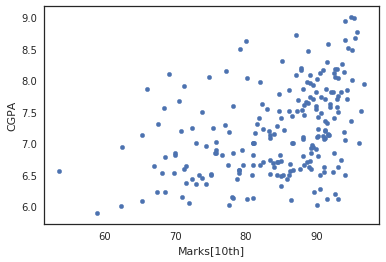

In [13]:

train.plot(kind ='scatter',x='Marks[10th]',y='CGPA')

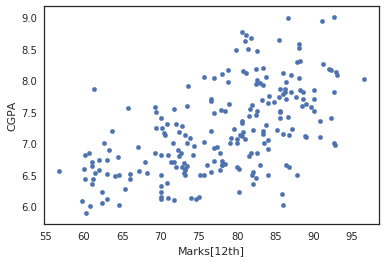

In [14]:
train.plot(kind ='scatter',x='Marks[12th]',y='CGPA')

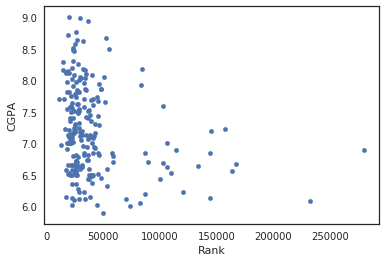

In [15]:
train.plot(kind ='scatter',x='Rank',y='CGPA')

In [16]:
train.head()

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
1,CIVIL,77.57,64.6,Male,BSEB Patna,BSEB Patna,OBC,6.29,44718.0,15.970714,6.02,1.0,4.0,6.12,5.94,5.41,6.25,6.13,1.0,4.0,3.0,2.0,0.0,5.0
2,CSE,86.40,71.8,Male,CBSE,CBSE,GEN,6.47,24222.0,8.650714,6.10,1.0,7.0,6.12,5.88,5.53,6.44,6.19,2.0,2.0,0.0,1.0,0.0,4.0
3,CSE,88.14,78.0,Male,ICSE,ICSE,GEN,7.35,24723.0,8.829643,6.65,1.0,1.0,6.35,6.54,6.41,6.50,6.69,1.0,1.0,3.0,0.0,0.0,5.0
4,CSE,65.40,59.8,Female,CBSE,CBSE,ST,6.41,232157.0,82.913214,6.09,1.0,11.0,6.00,5.71,5.24,5.88,6.25,2.0,0.0,2.0,2.0,0.0,1.0
5,CSE,81.00,74.0,Male,CBSE,CBSE,GEN,6.80,23252.0,8.304286,6.13,1.0,0.0,6.06,5.88,6.00,5.93,5.44,2.0,0.0,2.0,2.0,0.0,1.0


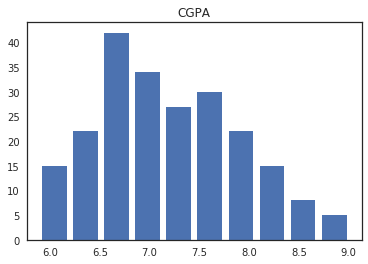

In [17]:
plt.hist(train['CGPA'],rwidth=0.8)
plt.title("CGPA")
plt.show()

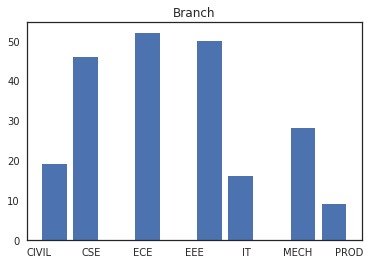

In [18]:
plt.hist(train['Branch'],rwidth=0.8)
plt.title("Branch")
plt.show()

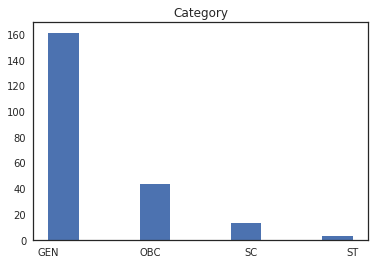

In [19]:
plt.hist(train['Category'])
#plt.hist(histtype="bar")
plt.title("Category")
plt.show()

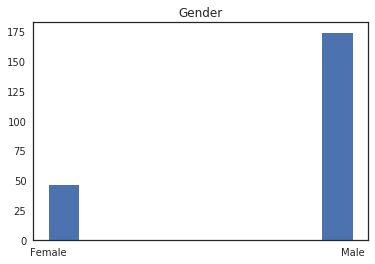

In [20]:
plt.hist(train['Gender'])
plt.title("Gender")
plt.show()

In [21]:
train.head()

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
1,CIVIL,77.57,64.6,Male,BSEB Patna,BSEB Patna,OBC,6.29,44718.0,15.970714,6.02,1.0,4.0,6.12,5.94,5.41,6.25,6.13,1.0,4.0,3.0,2.0,0.0,5.0
2,CSE,86.40,71.8,Male,CBSE,CBSE,GEN,6.47,24222.0,8.650714,6.10,1.0,7.0,6.12,5.88,5.53,6.44,6.19,2.0,2.0,0.0,1.0,0.0,4.0
3,CSE,88.14,78.0,Male,ICSE,ICSE,GEN,7.35,24723.0,8.829643,6.65,1.0,1.0,6.35,6.54,6.41,6.50,6.69,1.0,1.0,3.0,0.0,0.0,5.0
4,CSE,65.40,59.8,Female,CBSE,CBSE,ST,6.41,232157.0,82.913214,6.09,1.0,11.0,6.00,5.71,5.24,5.88,6.25,2.0,0.0,2.0,2.0,0.0,1.0
5,CSE,81.00,74.0,Male,CBSE,CBSE,GEN,6.80,23252.0,8.304286,6.13,1.0,0.0,6.06,5.88,6.00,5.93,5.44,2.0,0.0,2.0,2.0,0.0,1.0


In [22]:
cgpa = train["CGPA"]

cgpa.describe()


count    220.000000
mean       7.199468
std        0.700186
min        5.890000
25%        6.637500
50%        7.125000
75%        7.702500
max        9.010000
Name: CGPA, dtype: float64

Text(0.5,1,'CGPA')

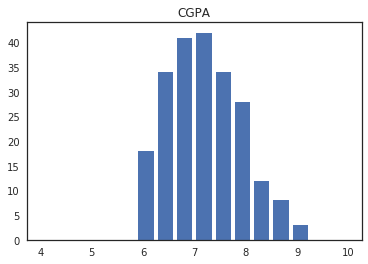

In [23]:
plt.hist(cgpa, range = (4,10),bins=16,rwidth=0.8)
plt.title("CGPA")

In [24]:
from pandas.tools.plotting import radviz
#radviz(train.drop("CGPA", axis=1), "Branch")

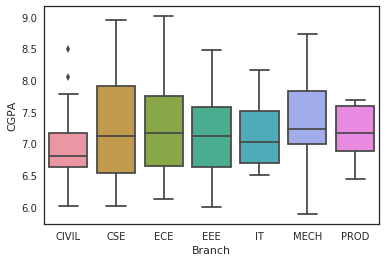

In [25]:
sns.boxplot(x="Branch", y="CGPA", data=train)

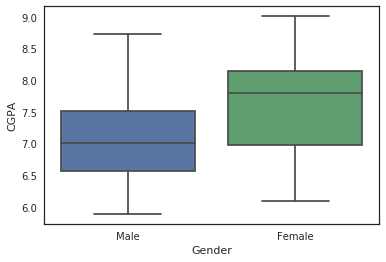

In [26]:
sns.boxplot(x="Gender", y="CGPA", data=train)

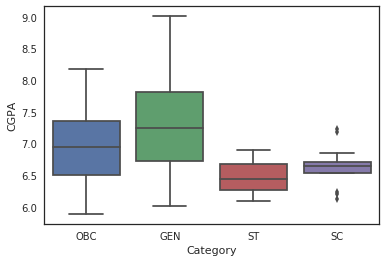

In [27]:
sns.boxplot(x="Category", y="CGPA", data=train)

In [28]:
train = sns.load_dataset("train")
train = train.pivot("Branch", "Gender", "CGPA")
ax = sns.heatmap(train)

URLError: <urlopen error [Errno -2] Name or service not known>

In [29]:
train.columns

Index(['Branch', 'Marks[10th]', 'Marks[12th]', 'Gender', 'Board[10th]',
       'Board[12th]', 'Category', 'GPA 1', 'Rank', 'Normalized Rank', 'CGPA',
       'Current Back', 'Ever Back', 'GPA 2', 'GPA 3', 'GPA 4', 'GPA 5',
       'GPA 6', 'Olympiads Qualified', 'Technical Projects', 'Tech Quiz',
       'Engg. Coaching', 'NTSE Scholarships', 'Miscellany Tech Events'],
      dtype='object')

In [30]:
scale_list = [ 'Marks[10th]', 'Marks[12th]', 'GPA 1', 'Rank', 'Normalized Rank', 'CGPA',
       'Current Back', 'Ever Back', 'GPA 2', 'GPA 3', 'GPA 4', 'GPA 5',
       'GPA 6', 'Olympiads Qualified', 'Technical Projects', 'Tech Quiz',
       'Engg. Coaching', 'NTSE Scholarships', 'Miscellany Tech Events']
sc = train[scale_list]

In [31]:
sc.head()

,Marks[10th],Marks[12th],GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
1,77.57,64.6,6.29,44718.0,15.970714,6.02,1.0,4.0,6.12,5.94,5.41,6.25,6.13,1.0,4.0,3.0,2.0,0.0,5.0
2,86.40,71.8,6.47,24222.0,8.650714,6.10,1.0,7.0,6.12,5.88,5.53,6.44,6.19,2.0,2.0,0.0,1.0,0.0,4.0
3,88.14,78.0,7.35,24723.0,8.829643,6.65,1.0,1.0,6.35,6.54,6.41,6.50,6.69,1.0,1.0,3.0,0.0,0.0,5.0
4,65.40,59.8,6.41,232157.0,82.913214,6.09,1.0,11.0,6.00,5.71,5.24,5.88,6.25,2.0,0.0,2.0,2.0,0.0,1.0
5,81.00,74.0,6.80,23252.0,8.304286,6.13,1.0,0.0,6.06,5.88,6.00,5.93,5.44,2.0,0.0,2.0,2.0,0.0,1.0


In [32]:
sc.tail()

,Marks[10th],Marks[12th],GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
216,78.8,66.0,6.35,100000.0,35.714286,6.44,0.0,3.0,6.35,6.06,6.00,6.94,7.00,3.0,3.0,0.0,3.0,0.0,5.0
217,91.0,81.0,7.00,36706.0,13.109286,7.07,0.0,0.0,6.65,6.47,6.71,7.94,7.75,0.0,4.0,0.0,4.0,0.0,5.0
218,91.2,80.6,74.70,39792.0,14.211429,7.36,0.0,2.0,71.80,67.20,72.90,81.90,7.69,4.0,1.0,3.0,4.0,0.0,5.0
219,79.4,63.2,6.71,114306.0,40.823571,6.89,0.0,0.0,6.12,6.41,6.88,7.44,7.69,1.0,1.0,0.0,1.0,0.0,5.0
220,87.4,83.2,7.18,40000.0,14.285714,7.69,0.0,0.0,6.88,7.06,7.88,8.56,8.69,2.0,1.0,1.0,1.0,1.0,5.0


In [33]:
sc.fillna(0)

,Marks[10th],Marks[12th],GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
1,77.57,64.60,6.29,44718.0,15.970714,6.020,1.0,4.0,6.12,5.94,5.41,6.25,6.130,1.0,4.0,3.0,2.0,0.0,5.0
2,86.40,71.80,6.47,24222.0,8.650714,6.100,1.0,7.0,6.12,5.88,5.53,6.44,6.190,2.0,2.0,0.0,1.0,0.0,4.0
3,88.14,78.00,7.35,24723.0,8.829643,6.650,1.0,1.0,6.35,6.54,6.41,6.50,6.690,1.0,1.0,3.0,0.0,0.0,5.0
4,65.40,59.80,6.41,232157.0,82.913214,6.090,1.0,11.0,6.00,5.71,5.24,5.88,6.250,2.0,0.0,2.0,2.0,0.0,1.0
5,81.00,74.00,6.80,23252.0,8.304286,6.130,1.0,0.0,6.06,5.88,6.00,5.93,5.440,2.0,0.0,2.0,2.0,0.0,1.0
6,74.40,82.00,6.88,23257.0,8.306071,6.350,1.0,4.0,6.71,6.35,5.94,5.88,4.560,2.0,0.0,1.0,0.0,2.0,3.0
7,83.80,73.00,7.24,103217.0,36.863214,6.690,1.0,0.0,6.53,6.29,6.12,7.00,7.000,3.0,2.0,1.0,3.0,0.0,3.0
8,82.00,78.00,7.00,23010.0,8.217857,6.660,1.0,0.0,7.59,6.35,6.35,6.00,5.500,3.0,2.0,1.0,2.0,1.0,0.0
9,62.40,60.80,5.83,74086.0,26.459286,6.000,1.0,9.0,6.31,6.13,6.06,5.69,6.000,3.0,2.0,1.0,2.0,1.0,0.0
10,80.20,63.00,6.48,70752.0,25.268571,6.120,1.0,0.0,6.30,5.61,6.20,6.03,5.380,4.0,2.0,2.0,4.0,0.0,5.0


In [34]:
scaler = StandardScaler()
sc = scaler.fit_transform(sc)


In [35]:
train[scale_list] = sc
train[scale_list].head()

,Marks[10th],Marks[12th],GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
1,-0.792630,-1.460973,-0.271000,0.099590,0.099590,-1.688349,3.455601,0.968301,-0.259578,-0.299024,-0.417347,-0.321909,-1.484917,-1.240545,1.565215,0.844080,-0.474684,-0.51461,1.581291
2,0.246178,-0.663065,-0.231801,-0.486029,-0.486029,-1.573833,3.455601,2.101418,-0.259578,-0.313569,-0.390673,-0.284599,-1.422375,-0.762577,0.106116,-1.332064,-0.962678,-0.51461,1.128906
3,0.450881,0.024023,-0.040160,-0.471714,-0.471714,-0.786536,3.455601,-0.164817,-0.207504,-0.153573,-0.195065,-0.272817,-0.901189,-1.240545,-0.623433,0.844080,-1.450671,-0.51461,1.581291
4,-2.224374,-1.992912,-0.244867,5.455168,5.455168,-1.588147,3.455601,3.612242,-0.286747,-0.354780,-0.455134,-0.394564,-1.359833,-0.762577,-1.352983,0.118699,-0.474684,-0.51461,-0.228249
5,-0.389107,-0.419259,-0.159935,-0.513744,-0.513744,-1.530889,3.455601,-0.542523,-0.273162,-0.313569,-0.286200,-0.384746,-2.204154,-0.762577,-1.352983,0.118699,-0.474684,-0.51461,-0.228249


In [36]:
train

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
1,CIVIL,-0.792630,-1.460973,Male,BSEB Patna,BSEB Patna,OBC,-0.271000,0.099590,0.099590,-1.688349,3.455601,0.968301,-0.259578,-0.299024,-0.417347,-0.321909,-1.484917,-1.240545,1.565215,0.844080,-0.474684,-0.514610,1.581291
2,CSE,0.246178,-0.663065,Male,CBSE,CBSE,GEN,-0.231801,-0.486029,-0.486029,-1.573833,3.455601,2.101418,-0.259578,-0.313569,-0.390673,-0.284599,-1.422375,-0.762577,0.106116,-1.332064,-0.962678,-0.514610,1.128906
3,CSE,0.450881,0.024023,Male,ICSE,ICSE,GEN,-0.040160,-0.471714,-0.471714,-0.786536,3.455601,-0.164817,-0.207504,-0.153573,-0.195065,-0.272817,-0.901189,-1.240545,-0.623433,0.844080,-1.450671,-0.514610,1.581291
4,CSE,-2.224374,-1.992912,Female,CBSE,CBSE,ST,-0.244867,5.455168,5.455168,-1.588147,3.455601,3.612242,-0.286747,-0.354780,-0.455134,-0.394564,-1.359833,-0.762577,-1.352983,0.118699,-0.474684,-0.514610,-0.228249
5,CSE,-0.389107,-0.419259,Male,CBSE,CBSE,GEN,-0.159935,-0.513744,-0.513744,-1.530889,3.455601,-0.542523,-0.273162,-0.313569,-0.286200,-0.384746,-2.204154,-0.762577,-1.352983,0.118699,-0.474684,-0.514610,-0.228249
6,ECE,-1.165566,0.467305,Male,BSEB,CBSE,GEN,-0.142513,-0.513602,-0.513602,-1.215971,3.455601,0.968301,-0.125997,-0.199632,-0.299537,-0.394564,-3.121440,-0.762577,-1.352983,-0.606683,-1.450671,0.984915,0.676521
7,ECE,-0.059700,-0.530080,Female,C.B.S.E,C.B.S.E,SC,-0.064115,1.771046,1.771046,-0.729278,3.455601,-0.542523,-0.166750,-0.214177,-0.259526,-0.174634,-0.578054,-0.284608,0.106116,-0.606683,0.013309,-0.514610,0.676521
8,ECE,-0.271461,0.024023,Male,B.S.E.B,B.S.E.B,GEN,-0.116381,-0.520659,-0.520659,-0.772221,3.455601,-0.542523,0.073243,-0.199632,-0.208401,-0.371000,-2.141611,-0.284608,0.106116,-0.606683,-0.474684,0.235153,-0.680634
9,EEE,-2.577310,-1.882091,Male,BSEB,BSEB,OBC,-0.371176,0.938704,0.938704,-1.716978,3.455601,2.856830,-0.216560,-0.252964,-0.272863,-0.431874,-1.620426,-0.284608,0.106116,-0.606683,-0.474684,0.235153,-0.680634
10,EEE,-0.483223,-1.638286,Male,CBSE,CBSE,OBC,-0.229623,0.843444,0.843444,-1.545204,3.455601,-0.542523,-0.218824,-0.379022,-0.241744,-0.365109,-2.266696,0.193360,0.106116,0.118699,0.501302,-0.514610,1.581291


In [37]:
train.head()

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
1,CIVIL,-0.792630,-1.460973,Male,BSEB Patna,BSEB Patna,OBC,-0.271000,0.099590,0.099590,-1.688349,3.455601,0.968301,-0.259578,-0.299024,-0.417347,-0.321909,-1.484917,-1.240545,1.565215,0.844080,-0.474684,-0.51461,1.581291
2,CSE,0.246178,-0.663065,Male,CBSE,CBSE,GEN,-0.231801,-0.486029,-0.486029,-1.573833,3.455601,2.101418,-0.259578,-0.313569,-0.390673,-0.284599,-1.422375,-0.762577,0.106116,-1.332064,-0.962678,-0.51461,1.128906
3,CSE,0.450881,0.024023,Male,ICSE,ICSE,GEN,-0.040160,-0.471714,-0.471714,-0.786536,3.455601,-0.164817,-0.207504,-0.153573,-0.195065,-0.272817,-0.901189,-1.240545,-0.623433,0.844080,-1.450671,-0.51461,1.581291
4,CSE,-2.224374,-1.992912,Female,CBSE,CBSE,ST,-0.244867,5.455168,5.455168,-1.588147,3.455601,3.612242,-0.286747,-0.354780,-0.455134,-0.394564,-1.359833,-0.762577,-1.352983,0.118699,-0.474684,-0.51461,-0.228249
5,CSE,-0.389107,-0.419259,Male,CBSE,CBSE,GEN,-0.159935,-0.513744,-0.513744,-1.530889,3.455601,-0.542523,-0.273162,-0.313569,-0.286200,-0.384746,-2.204154,-0.762577,-1.352983,0.118699,-0.474684,-0.51461,-0.228249


In [38]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 1 to 220
Data columns (total 24 columns):
Branch                    220 non-null object
Marks[10th]               220 non-null float64
Marks[12th]               220 non-null float64
Gender                    220 non-null object
Board[10th]               220 non-null object
Board[12th]               220 non-null object
Category                  220 non-null object
GPA 1                     220 non-null float64
Rank                      220 non-null float64
Normalized Rank           220 non-null float64
CGPA                      220 non-null float64
Current Back              220 non-null float64
Ever Back                 220 non-null float64
GPA 2                     220 non-null float64
GPA 3                     220 non-null float64
GPA 4                     220 non-null float64
GPA 5                     220 non-null float64
GPA 6                     220 non-null float64
Olympiads Qualified       220 non-null float64
Technic

In [39]:
encoding_list = ['Branch','Gender','Board[10th]','Board[12th]','Category']
train[encoding_list] = train[encoding_list].apply(LabelEncoder().fit_transform)

In [40]:
train.head()

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
1,0,-0.792630,-1.460973,1,11,11,1,-0.271000,0.099590,0.099590,-1.688349,3.455601,0.968301,-0.259578,-0.299024,-0.417347,-0.321909,-1.484917,-1.240545,1.565215,0.844080,-0.474684,-0.51461,1.581291
2,1,0.246178,-0.663065,1,18,19,0,-0.231801,-0.486029,-0.486029,-1.573833,3.455601,2.101418,-0.259578,-0.313569,-0.390673,-0.284599,-1.422375,-0.762577,0.106116,-1.332064,-0.962678,-0.51461,1.128906
3,1,0.450881,0.024023,1,25,29,0,-0.040160,-0.471714,-0.471714,-0.786536,3.455601,-0.164817,-0.207504,-0.153573,-0.195065,-0.272817,-0.901189,-1.240545,-0.623433,0.844080,-1.450671,-0.51461,1.581291
4,1,-2.224374,-1.992912,0,18,19,3,-0.244867,5.455168,5.455168,-1.588147,3.455601,3.612242,-0.286747,-0.354780,-0.455134,-0.394564,-1.359833,-0.762577,-1.352983,0.118699,-0.474684,-0.51461,-0.228249
5,1,-0.389107,-0.419259,1,18,19,0,-0.159935,-0.513744,-0.513744,-1.530889,3.455601,-0.542523,-0.273162,-0.313569,-0.286200,-0.384746,-2.204154,-0.762577,-1.352983,0.118699,-0.474684,-0.51461,-0.228249


In [41]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 1 to 220
Data columns (total 24 columns):
Branch                    220 non-null int64
Marks[10th]               220 non-null float64
Marks[12th]               220 non-null float64
Gender                    220 non-null int64
Board[10th]               220 non-null int64
Board[12th]               220 non-null int64
Category                  220 non-null int64
GPA 1                     220 non-null float64
Rank                      220 non-null float64
Normalized Rank           220 non-null float64
CGPA                      220 non-null float64
Current Back              220 non-null float64
Ever Back                 220 non-null float64
GPA 2                     220 non-null float64
GPA 3                     220 non-null float64
GPA 4                     220 non-null float64
GPA 5                     220 non-null float64
GPA 6                     220 non-null float64
Olympiads Qualified       220 non-null float64
Technical Pr

**Linear Regression**

In [42]:
train['CGPA']

1     -1.688349
2     -1.573833
3     -0.786536
4     -1.588147
5     -1.530889
6     -1.215971
7     -0.729278
8     -0.772221
9     -1.716978
10    -1.545204
11    -1.387745
12    -1.330487
13    -0.858108
14    -1.015568
15    -1.874437
16    -0.342787
17    -0.901052
18    -1.187342
19    -0.357101
20    -0.156698
21    -0.772221
22    -0.013553
23    -0.700649
24    -1.087140
25    -0.800850
26     0.458825
27    -0.571818
28    -0.099440
29     0.831002
30    -0.543189
         ...   
191    2.190879
192    0.287051
193    0.716486
194    1.360638
195   -1.258914
196    0.287051
197   -0.070811
198   -1.387745
199    0.015076
200    0.158221
201    1.432211
202    1.117292
203   -0.901052
204    0.873945
205    1.017090
206    0.788058
207    0.058019
208    1.117292
209    1.589670
210   -0.099440
211   -0.085126
212   -0.514560
213   -0.042182
214    0.591950
215    0.559026
216   -1.087140
217   -0.185327
218    0.229793
219   -0.442988
220    0.702171
Name: CGPA, Length: 220,

In [43]:
y = train['CGPA']
x = train.drop('CGPA', axis=1)

In [44]:
x.head()

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
1,0,-0.792630,-1.460973,1,11,11,1,-0.271000,0.099590,0.099590,3.455601,0.968301,-0.259578,-0.299024,-0.417347,-0.321909,-1.484917,-1.240545,1.565215,0.844080,-0.474684,-0.51461,1.581291
2,1,0.246178,-0.663065,1,18,19,0,-0.231801,-0.486029,-0.486029,3.455601,2.101418,-0.259578,-0.313569,-0.390673,-0.284599,-1.422375,-0.762577,0.106116,-1.332064,-0.962678,-0.51461,1.128906
3,1,0.450881,0.024023,1,25,29,0,-0.040160,-0.471714,-0.471714,3.455601,-0.164817,-0.207504,-0.153573,-0.195065,-0.272817,-0.901189,-1.240545,-0.623433,0.844080,-1.450671,-0.51461,1.581291
4,1,-2.224374,-1.992912,0,18,19,3,-0.244867,5.455168,5.455168,3.455601,3.612242,-0.286747,-0.354780,-0.455134,-0.394564,-1.359833,-0.762577,-1.352983,0.118699,-0.474684,-0.51461,-0.228249
5,1,-0.389107,-0.419259,1,18,19,0,-0.159935,-0.513744,-0.513744,3.455601,-0.542523,-0.273162,-0.313569,-0.286200,-0.384746,-2.204154,-0.762577,-1.352983,0.118699,-0.474684,-0.51461,-0.228249


In [45]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220 entries, 1 to 220
Data columns (total 23 columns):
Branch                    220 non-null int64
Marks[10th]               220 non-null float64
Marks[12th]               220 non-null float64
Gender                    220 non-null int64
Board[10th]               220 non-null int64
Board[12th]               220 non-null int64
Category                  220 non-null int64
GPA 1                     220 non-null float64
Rank                      220 non-null float64
Normalized Rank           220 non-null float64
Current Back              220 non-null float64
Ever Back                 220 non-null float64
GPA 2                     220 non-null float64
GPA 3                     220 non-null float64
GPA 4                     220 non-null float64
GPA 5                     220 non-null float64
GPA 6                     220 non-null float64
Olympiads Qualified       220 non-null float64
Technical Projects        220 non-null float64
Tech Quiz   

In [46]:
X_train, X_test, y_train, y_test = train_test_split(x, y ,test_size=0.3)

In [47]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 154 entries, 16 to 33
Data columns (total 23 columns):
Branch                    154 non-null int64
Marks[10th]               154 non-null float64
Marks[12th]               154 non-null float64
Gender                    154 non-null int64
Board[10th]               154 non-null int64
Board[12th]               154 non-null int64
Category                  154 non-null int64
GPA 1                     154 non-null float64
Rank                      154 non-null float64
Normalized Rank           154 non-null float64
Current Back              154 non-null float64
Ever Back                 154 non-null float64
GPA 2                     154 non-null float64
GPA 3                     154 non-null float64
GPA 4                     154 non-null float64
GPA 5                     154 non-null float64
GPA 6                     154 non-null float64
Olympiads Qualified       154 non-null float64
Technical Projects        154 non-null float64
Tech Quiz   

In [48]:
X_train.shape


(154, 23)

In [49]:

X_test.shape



(66, 23)

In [50]:
y_test.shape

(66,)

**LINEAR REGRESSION**

In [51]:
logreg=LinearRegression()

Training

In [52]:
logreg.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [53]:
y_pred=logreg.predict(X_test)

In [54]:
y_test

86     2.062048
48    -0.428674
211   -0.085126
220    0.702171
182   -0.213956
119    0.616284
188   -0.256900
23    -0.700649
46     0.229793
17    -0.901052
166   -1.001253
121   -0.371416
38    -0.972624
72    -1.631091
99     1.575355
13    -0.858108
74    -0.271214
11    -1.387745
7     -0.729278
89     1.875960
78     0.873945
69    -1.072826
194    1.360638
123   -1.001253
175   -0.285529
110   -0.815165
29     0.831002
151   -0.514560
145    1.317695
30    -0.543189
         ...   
57    -1.545204
24    -1.087140
68     0.644913
76     1.203179
165   -0.800850
180   -0.757907
51     2.248137
159   -0.686334
143   -1.502260
15    -1.874437
85    -1.545204
40    -1.001253
14    -1.015568
102    1.389267
202    1.117292
115   -1.001253
39    -0.886737
111    0.401567
75     0.043705
189   -0.285529
90     2.047734
191    2.190879
96    -0.027868
132    1.818702
59    -0.271214
65    -0.571818
181    1.374953
141    1.518097
101    0.633462
125   -0.013553
Name: CGPA, Length: 66, 

In [55]:
y_pred

array([ 1.24783407,  0.10377918,  0.26243289,  0.92457719,  0.0321585 ,
        0.20404801, -0.03421793, -0.32517481,  0.23534936, -0.65557393,
       -0.87989525,  0.03374897, -1.51710535, -1.40710774,  1.21819616,
       -1.05444509, -0.1299671 , -0.79562996, -0.35987049,  1.41795765,
        0.95971584,  0.29512869,  1.34354488, -0.5090332 , -0.1305646 ,
       -0.69571312,  0.86672173, -0.17963187,  0.64849635, -0.04461155,
       -0.6480095 ,  0.10539634, -0.88634484,  0.14053892, -1.57661716,
       -0.66724641, -1.33730845, -1.69747588,  0.83865016,  1.17705863,
       -0.13356618, -0.81823655,  1.82664692, -1.01677176, -1.24863841,
       -0.89804647, -1.39642119, -1.42579558, -0.94532821,  0.33573995,
        0.77234524, -0.5543215 , -0.81953073,  0.38014573,  1.12512615,
        0.23252468,  1.95345508,  1.5977713 , -0.09435077,  1.13254894,
        0.96708624, -0.06373571,  1.18879025,  1.37264131,  0.64363162,
       -0.34038853])

In [56]:
print(metrics.mean_squared_error(y_test, y_pred))

0.2239505733777072


**XBOOST ALGORITHM**

In [57]:
xgb = xgboost.XGBRegressor(n_estimators=2500, learning_rate=0.06, gamma=0, subsample=0.6,
                           colsample_bytree=0.7, min_child_weight=4, max_depth=3)

In [60]:
xgb.fit(X_train,y_train)

In [59]:
train.head()

,Branch,Marks[10th],Marks[12th],Gender,Board[10th],Board[12th],Category,GPA 1,Rank,Normalized Rank,CGPA,Current Back,Ever Back,GPA 2,GPA 3,GPA 4,GPA 5,GPA 6,Olympiads Qualified,Technical Projects,Tech Quiz,Engg. Coaching,NTSE Scholarships,Miscellany Tech Events
1,0,-0.792630,-1.460973,1,11,11,1,-0.271000,0.099590,0.099590,-1.688349,3.455601,0.968301,-0.259578,-0.299024,-0.417347,-0.321909,-1.484917,-1.240545,1.565215,0.844080,-0.474684,-0.51461,1.581291
2,1,0.246178,-0.663065,1,18,19,0,-0.231801,-0.486029,-0.486029,-1.573833,3.455601,2.101418,-0.259578,-0.313569,-0.390673,-0.284599,-1.422375,-0.762577,0.106116,-1.332064,-0.962678,-0.51461,1.128906
3,1,0.450881,0.024023,1,25,29,0,-0.040160,-0.471714,-0.471714,-0.786536,3.455601,-0.164817,-0.207504,-0.153573,-0.195065,-0.272817,-0.901189,-1.240545,-0.623433,0.844080,-1.450671,-0.51461,1.581291
4,1,-2.224374,-1.992912,0,18,19,3,-0.244867,5.455168,5.455168,-1.588147,3.455601,3.612242,-0.286747,-0.354780,-0.455134,-0.394564,-1.359833,-0.762577,-1.352983,0.118699,-0.474684,-0.51461,-0.228249
5,1,-0.389107,-0.419259,1,18,19,0,-0.159935,-0.513744,-0.513744,-1.530889,3.455601,-0.542523,-0.273162,-0.313569,-0.286200,-0.384746,-2.204154,-0.762577,-1.352983,0.118699,-0.474684,-0.51461,-0.228249
